In [17]:
import pandas as pd
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt

In [18]:
# 载入情感分析后的数据
posdata = pd.read_csv("data/posdata.csv", encoding = 'utf-8')
negdata = pd.read_csv("data/negdata.csv", encoding = 'utf-8')

In [19]:
from gensim import corpora, models
# 建立词典
pos_dict = corpora.Dictionary([[i] for i in posdata['word']])  # 正面
neg_dict = corpora.Dictionary([[i] for i in negdata['word']])  # 负面

In [20]:
# 建立语料库
pos_corpus = [pos_dict.doc2bow(j) for j in [[i] for i in posdata['word']]]  # 正面
neg_corpus = [neg_dict.doc2bow(j) for j in [[i] for i in negdata['word']]]   # 负面

In [21]:
#主题数寻优

# 构造主题数寻优函数
def cos(vector1, vector2):  # 余弦相似度函数
    dot_product = 0.0;  
    normA = 0.0;  
    normB = 0.0;  
    for a,b in zip(vector1, vector2): 
        dot_product += a*b  
        normA += a**2  
        normB += b**2  
    if normA == 0.0 or normB==0.0:  
        return(None)  
    else:  
        return(dot_product / ((normA*normB)**0.5))   

In [22]:
# 主题数寻优
def lda_k(x_corpus, x_dict):  
    
    # 初始化平均余弦相似度
    mean_similarity = []
    mean_similarity.append(1)
    
    # 循环生成主题并计算主题间相似度
    for i in np.arange(2,11):
        lda = models.LdaModel(x_corpus, num_topics = i, id2word = x_dict)  # LDA模型训练
        for j in np.arange(i):
            term = lda.show_topics(num_words = 50)
            
        # 提取各主题词
        top_word = []
        for k in np.arange(i):
            top_word.append([''.join(re.findall('"(.*)"',i)) \
                             for i in term[k][1].split('+')])  # 列出所有词
           
        # 构造词频向量
        word = sum(top_word,[])  # 列出所有的词   
        unique_word = set(word)  # 去除重复的词
        
        # 构造主题词列表，行表示主题号，列表示各主题词
        mat = []
        for j in np.arange(i):
            top_w = top_word[j]
            mat.append(tuple([top_w.count(k) for k in unique_word]))  
            
        p = list(itertools.permutations(list(np.arange(i)),2))
        l = len(p)
        top_similarity = [0]
        for w in np.arange(l):
            vector1 = mat[p[w][0]]
            vector2 = mat[p[w][1]]
            top_similarity.append(cos(vector1, vector2))
            
        # 计算平均余弦相似度
        mean_similarity.append(sum(top_similarity)/l)
    return(mean_similarity)

In [23]:
#计算主题平均余弦相似度
pos_k = lda_k(pos_corpus, pos_dict)
neg_k = lda_k(neg_corpus, neg_dict)   

In [24]:
#绘制主题平均余弦相似度图形
from matplotlib.font_manager import FontProperties  
font = FontProperties(size=14)

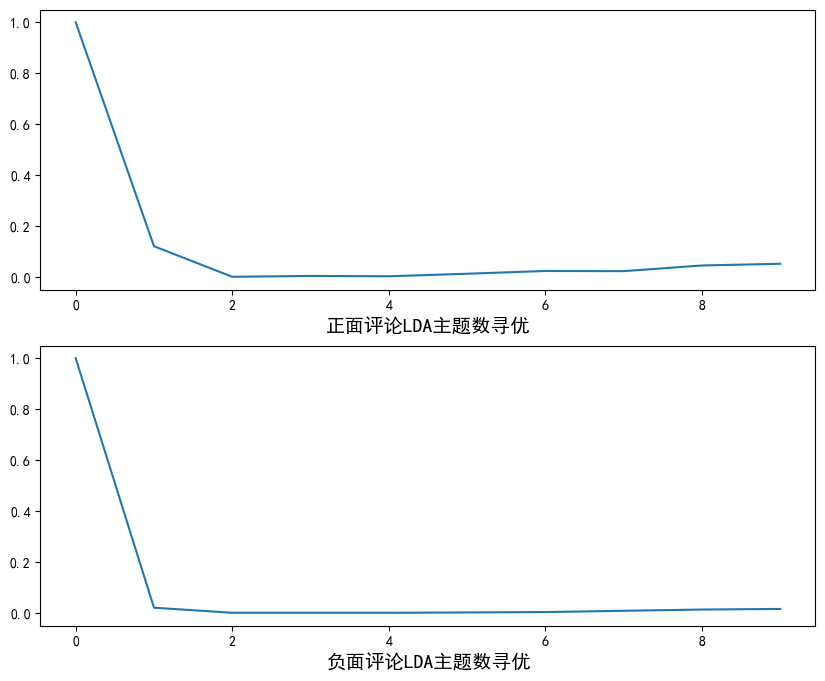

In [25]:
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False  
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax1.plot(pos_k)
ax1.set_xlabel('正面评论LDA主题数寻优', fontproperties=font)
ax2 = fig.add_subplot(212)
ax2.plot(neg_k)
ax2.set_xlabel('负面评论LDA主题数寻优', fontproperties=font)
plt.show()

In [ ]:
#LDA主题分析
pos_lda = models.LdaModel(pos_corpus, num_topics = 3, id2word = pos_dict)  
neg_lda = models.LdaModel(neg_corpus, num_topics = 3, id2word = neg_dict)  
pos_lda.print_topics(num_words = 10)

neg_lda.print_topics(num_words = 10)